In [ ]:

import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:

#data = pd.read_csv('data_better.csv')
data = pd.read_csv('/content/data_better.csv')

data.head(100)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
95,96,8/22/2022,Sandwich,Fastfood,60,15,900,NaN,Mr.,Morning
96,97,3/29/2023,Cold coffee,Beverages,40,13,520,Online,Mr.,Evening
97,98,12/24/2022,Vadapav,Fastfood,20,1,20,Online,Mr.,Morning
98,99,09-11-2022,Sugarcane juice,Beverages,25,3,75,Cash,Mr.,Evening


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
data.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

In [ ]:
data.shape

(1000, 10)

In [ ]:
data.describe()


,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [ ]:
data['date'] = data['date'].str.replace('/', '-')

In [ ]:
data['date'].head()

,date
0,07-03-2022
1,8-23-2022
2,11-20-2022
3,02-03-2023
4,10-02-2022


In [ ]:
data['item_name'].value_counts()

,count
item_name,
Cold coffee,161
Sugarcane juice,153
Panipuri,150
Frankie,139
Aalopuri,134
Vadapav,134
Sandwich,129


In [ ]:
data['item_type'].isna().sum()

0

In [ ]:
(data['quantity'] == 0).sum()

0

In [ ]:
data.nunique()

,0
order_id,1000
date,348
item_name,7
item_type,2
item_price,5
quantity,15
transaction_amount,48
transaction_type,2
received_by,2
time_of_sale,5


In [ ]:
data.isnull().sum()


,0
order_id,0
date,0
item_name,0
item_type,0
item_price,0
quantity,0
transaction_amount,0
transaction_type,107
received_by,0
time_of_sale,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop(["order_id","transaction_amount"], axis=1, inplace=True)


In [ ]:
data['item_type'].value_counts()

,count
item_type,
Fastfood,686
Beverages,314


In [ ]:
data['item_price'].value_counts()

,count
item_price,
20,418
40,161
25,153
50,139
60,129


In [ ]:
data['quantity'].value_counts()

,count
quantity,
13,86
10,81
7,76
15,74
14,73
1,71
2,70
6,69
5,61


In [ ]:
data['transaction_type'].value_counts()

,count
transaction_type,
Cash,476
Online,417


In [ ]:
# Assuming 'data' is your DataFrame
# Calculate the most frequent value in the 'transaction_type' column
most_frequent_value = data['transaction_type'].value_counts().idxmax()

# Fill NaN values with this most frequent value
data['transaction_type'].fillna(most_frequent_value, inplace=True)

# Check the result
print(data['transaction_type'].value_counts())

transaction_type
Cash      583
Online    417
Name: count, dtype: int64


<ipython-input-28-ad82990ae2c2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['transaction_type'].fillna(most_frequent_value, inplace=True)


In [ ]:
data['received_by'].value_counts()

,count
received_by,
Mr.,512
Mrs.,488


In [ ]:
data['time_of_sale'].value_counts()

,count
time_of_sale,
Night,205
Afternoon,205
Evening,201
Midnight,199
Morning,190


In [ ]:
itcnt =data['item_type'].value_counts()

<Axes: xlabel='item_type'>

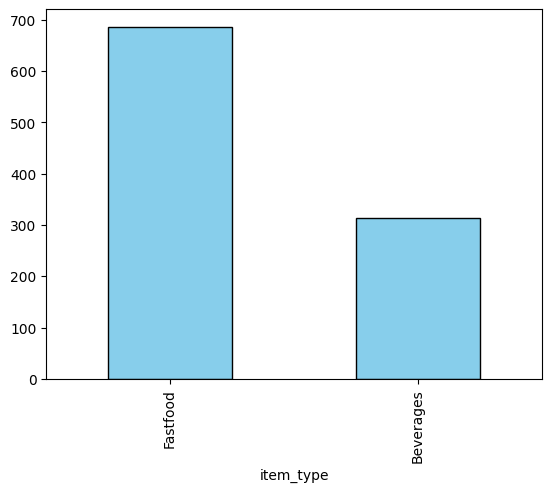

In [ ]:
itcnt.plot(kind='bar', color='skyblue', edgecolor='black')

In [ ]:
# Calculate total cost
data['total_cost'] = data['item_price'] * data['quantity']



In [ ]:
data.head()

,date,item_name,item_type,item_price,quantity,transaction_type,received_by,time_of_sale,total_cost
0,07-03-2022,Aalopuri,Fastfood,20,13,NaN,Mr.,Night,260
1,8-23-2022,Vadapav,Fastfood,20,15,Cash,Mr.,Afternoon,300
2,11-20-2022,Vadapav,Fastfood,20,1,Cash,Mr.,Afternoon,20
3,02-03-2023,Sugarcane juice,Beverages,25,6,Online,Mr.,Night,150
4,10-02-2022,Sugarcane juice,Beverages,25,8,Online,Mr.,Evening,200


In [ ]:
  itname_quant = data[data['item_type']=='Fastfood'].groupby('item_name')['quantity'].sum()

<Axes: xlabel='item_name'>

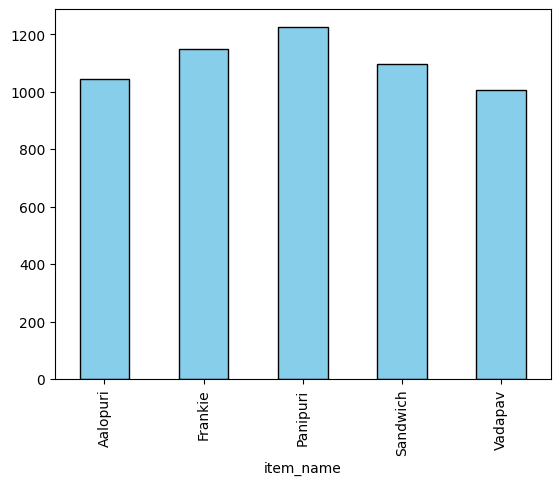

In [ ]:
itname_quant.plot(kind='bar', color='skyblue', edgecolor='black') # for fast food only

In [ ]:
itname_quant = data[data['item_type']=='Beverages'].groupby('item_name')['quantity'].sum()

<Axes: xlabel='item_name'>

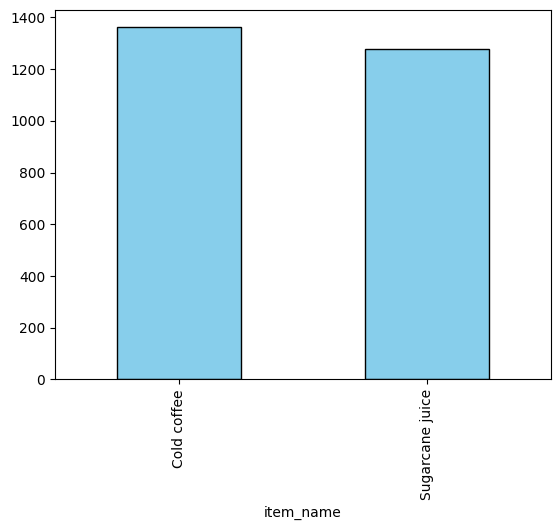

In [ ]:
itname_quant.plot(kind='bar', color='skyblue', edgecolor='black') # for beverages only

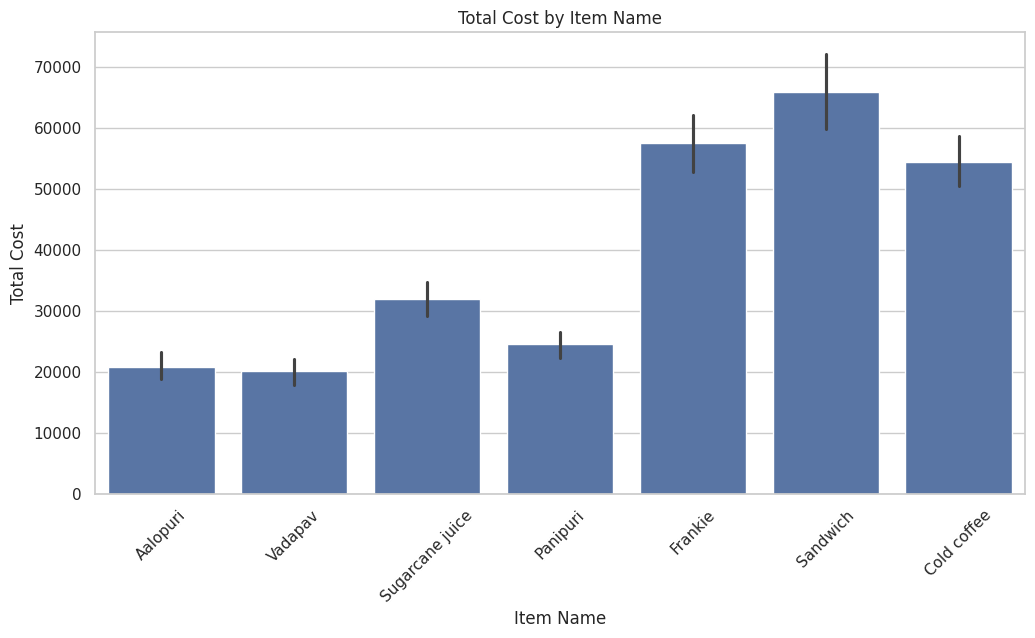

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot of revenue by item_name
plt.figure(figsize=(12, 6))
sns.barplot(x='item_name', y='total_cost', data=data, estimator=sum)
plt.xticks(rotation=45)
plt.title('Total Cost by Item Name')
plt.xlabel('Item Name')
plt.ylabel('Total Cost')
plt.show()

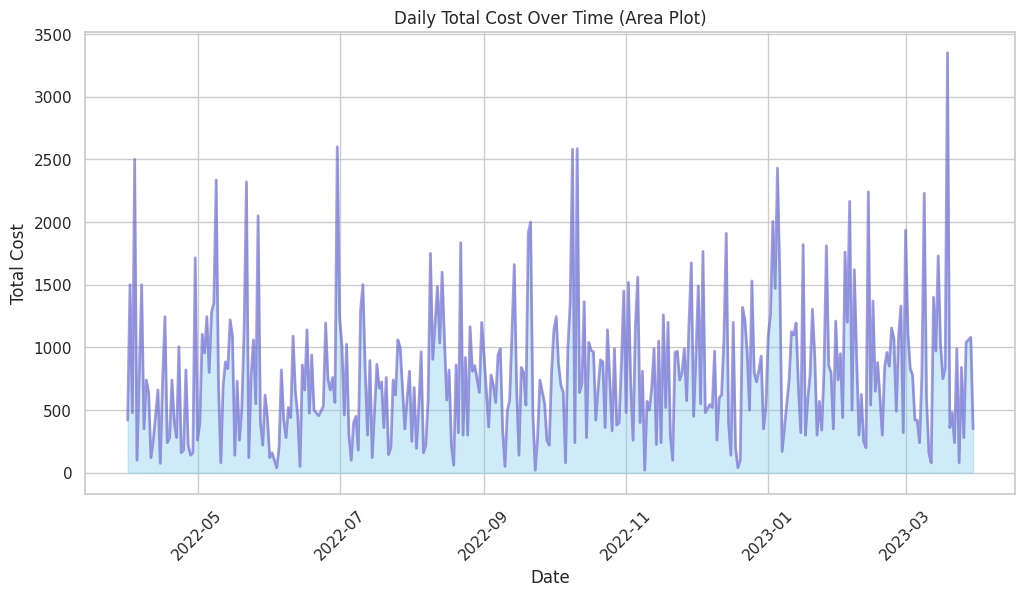

In [ ]:
# Create an area plot of total cost over time
# Ensure 'date' is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Aggregate total cost by date
daily_revenue = data.groupby('date')['total_cost'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.fill_between(daily_revenue['date'], daily_revenue['total_cost'], color='skyblue', alpha=0.4)
plt.plot(daily_revenue['date'], daily_revenue['total_cost'], color='Slateblue', alpha=0.6, linewidth=2)
plt.title('Daily Total Cost Over Time (Area Plot)')
plt.xlabel('Date')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)
plt.show()


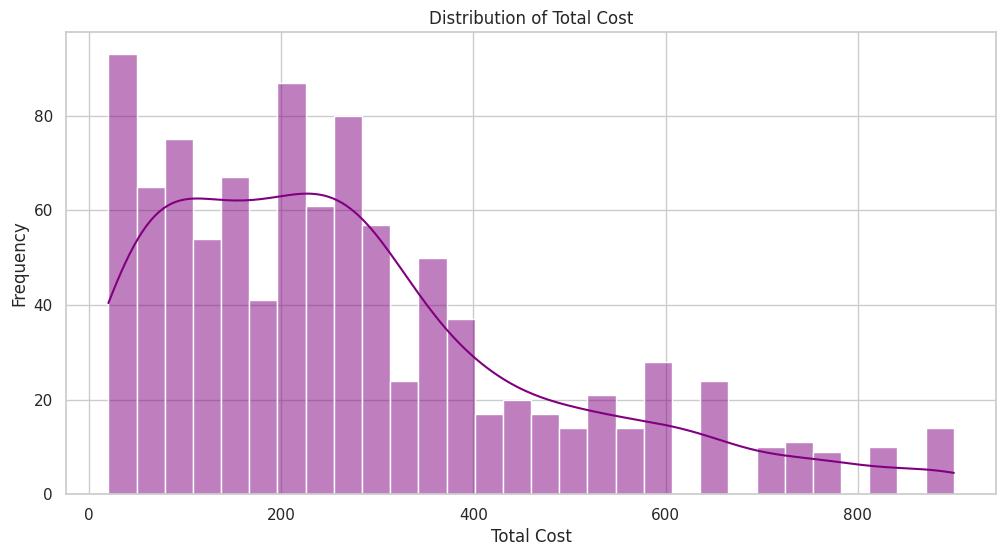

In [ ]:
# Create a histogram of total cost
plt.figure(figsize=(12, 6))
sns.histplot(data['total_cost'], bins=30, kde=True, color='purple')
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()


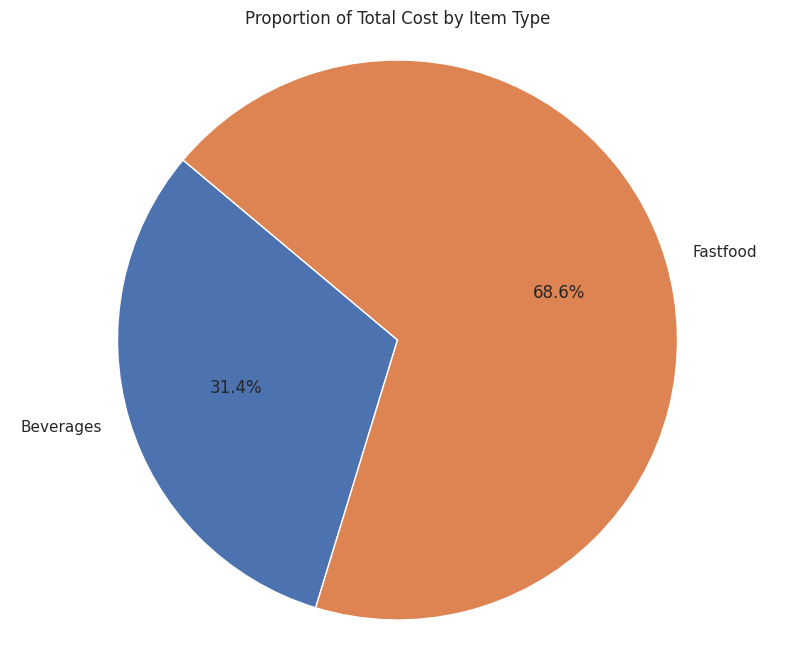

In [ ]:
# Aggregate total cost by item type
item_costs = data.groupby('item_type')['total_cost'].sum()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(item_costs, labels=item_costs.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Cost by Item Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<ipython-input-44-25bc613164f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transaction_type', data=data, palette='Set2')


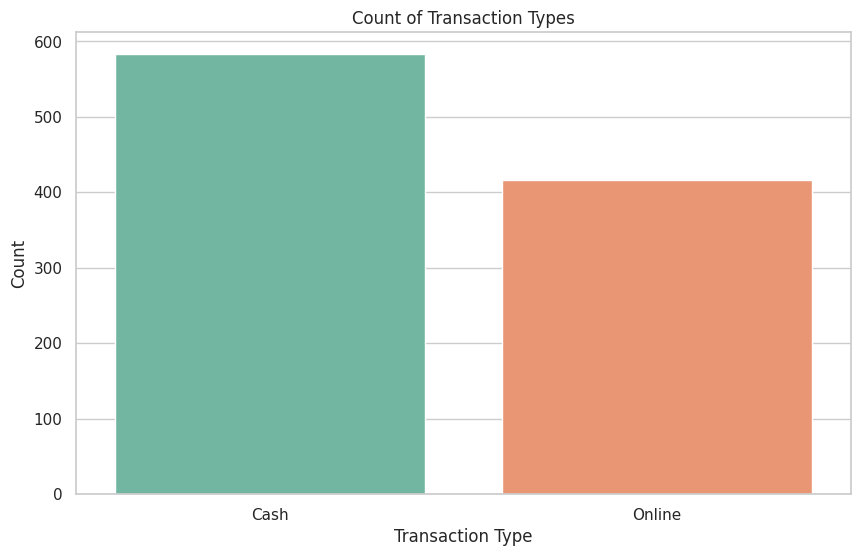

In [ ]:
#Count Plot of Transaction Types
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_type', data=data, palette='Set2')
plt.title('Count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


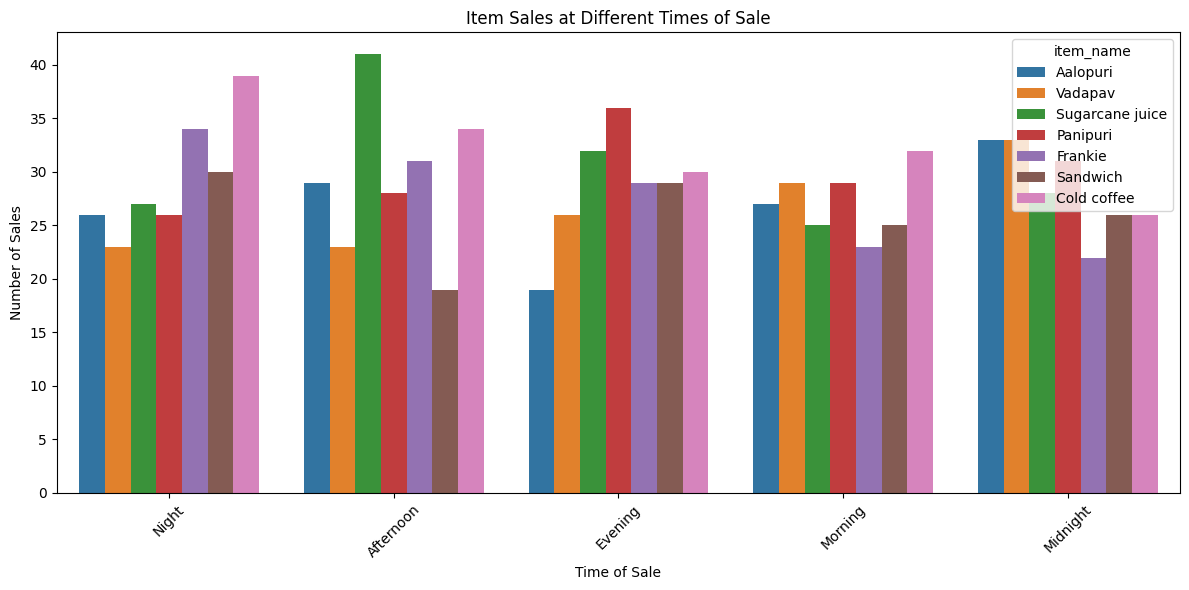

In [ ]:
# Create a count plot to visualize the frequency of items sold at different times of sale
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='time_of_sale', hue='item_name')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add title and labels
plt.title('Item Sales at Different Times of Sale')
plt.xlabel('Time of Sale')
plt.ylabel('Number of Sales')

# Show the plot
plt.tight_layout()
plt.show()